In [ ]:
Todos os arquivos dos dados foram considerados dentro de uma pasta databases contida na raiz do projeto

In [268]:
# Importando a biblioteca pandas e os

import pandas as pd
import os

In [269]:
# Definindo os anos correspondentes aos nomes dos arquivos

years = list(map(str, range(2010, 2021)))

In [270]:
# Adicionando a numeração de semestres aos anos
# O ano do indice correspondente será substituito pelo valor correspondente ao 1o semestre, enquanto que o segundo será alocado e adicionado ao indice seguinte
# Além disso, o ano de 2020 só possui dados do 1o semestre

for i in range(0, (len(years) - 1) * 2, 2):

    chosed_year = years[i]

    years[i] = chosed_year + '1'
    years.insert(i + 1, chosed_year + '2')

years[-1] = years[-1] + '1'

In [271]:
years

['20101',
 '20102',
 '20111',
 '20112',
 '20121',
 '20122',
 '20131',
 '20132',
 '20141',
 '20142',
 '20151',
 '20152',
 '20161',
 '20162',
 '20171',
 '20172',
 '20181',
 '20182',
 '20191',
 '20192',
 '20201']

In [272]:
# Importando os datasets de emprestimo, e concatenando os dados em um único DataFrame

df_emprestimos = pd.DataFrame()

for year in years:

    raw_path = os.path.join(os.path.dirname(os.getcwd()), "databases", f"emprestimos-{year}.csv")

    df_emprestimos = pd.concat([df_emprestimos, pd.read_csv(raw_path)])

In [273]:
# Visualizando os 5 primeiros registros

df_emprestimos.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [274]:
# Visualizando o formato do DataFrame

df_emprestimos.shape

(2258018, 7)

In [275]:
# Visualizando informações sobre o DataFrame

df_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258018 entries, 0 to 26560
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 137.8+ MB


In [276]:
# Verificando quantos dados da Series "codigo_barras" são nulos

df_emprestimos["codigo_barras"].isnull().sum()

np.int64(0)

In [277]:
# Verificando se existem registros duplicados

df_emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709705         2009032168     2010/01/17 18:56:43.909000000  2010/01/04 09:58:46.549000000  2010/01/20 13:14:34.464000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709704         2006021442     2010/01/17 18:56:43.923000000  2010/01/04 09:58:46.522000000  2010/02/01 13:59:02.528000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010/01/18 14:44:41.163000000  2010/01/04 09:21:19.099000000  2010/02/02 12:02:38.444000000  2.009047e+09        ALUNO DE GRADUAÇÃO        3
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    2
709687         L184117        2010/01/18 11:07:46.470000000  2010/01/04 08:24:21.284000000  2010/02/03 08:58:45.692000000  2.007211e+08        ALUNO D

In [278]:
# Removendo os registros duplicados

df_emprestimos = df_emprestimos.drop_duplicates()

In [279]:
# Importando o dataset de exemplares

df_exemplares = pd.read_parquet(os.path.join(os.path.dirname(os.getcwd()), "databases", "dados_exemplares.parquet"))

In [280]:
# Visualizando os 5 primeiros registros

df_exemplares.head(5)

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [281]:
# Verificando se há algum dado nulo na Serie "codigo_barras"

df_exemplares["codigo_barras"].isnull().sum()

np.int64(0)

In [282]:
# Mesclando os DataFrames a partir dos dados da coluna "codigo_barras"

df = pd.merge(df_emprestimos, df_exemplares, how="inner", on="codigo_barras")

In [283]:
# Visualizando os 5 primeiros registros dos DataFrames mesclados

df.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,91736


In [284]:
# Visualizando as informações sobre o DataFrame completo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           int64  
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           int64  
 12  registro_sistema      int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 205.6+ MB


In [285]:
# Adicionando a coluna de Classificação CDU (Classificação Geral Universal)

def classify(data: int) -> str:

    classifications = {
        "Generalidades. Ciência e conhecimento": data >= 0 and data <= 99,
        "Filosofia e psicologia": data >= 100 and data <= 199,
        "Religião": data >= 200 and data <= 299,
        "Ciências sociais": data >= 300 and data <= 399,
        "Classe vaga. Provisoriamente não ocupada": data >= 400 and data <= 499,
        "Matemática e ciências naturais": data >= 500 and data <= 599,
        "Ciências aplicadas": data >= 600 and data <= 699,
        "Belas artes": data >= 700 and data <= 799,
        "Linguagem. Língua. Linguística": data >= 800 and data <= 899, 
        "Geografia. Biografia. História": data >= 900 and data <= 999
    }

    for classification in classifications.keys():

        if classifications.get(classification):

            return classification

    return ""

df["CDU"] = df["localizacao"].apply(classify)

In [286]:
# Visualizando novamente os 5 primeiros registros

df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,91736,Ciências aplicadas


In [287]:
# Removendo a coluna "registro_sistema"

df = df.drop("registro_sistema", axis=1)

In [288]:
# Visualizando os 5 primeiros registros

df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


In [289]:
# Convertendo os dados associados a coluna "matricula_ou_siape" para str (e removendo o ponto flutuante)

df["matricula_ou_siape"] = df["matricula_ou_siape"].astype(str).str.replace(".0", "")

In [290]:
# Visualizando os 5 primeiros registros

df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


In [291]:
# Convertendo as colunas com dados de data de str para datetime

for column_name in filter(lambda x: x.startswith("data"), df.columns):
    
    df[column_name] = pd.to_datetime(df[column_name])

In [292]:
# Visualizando os 5 primeiros registros

df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


In [293]:
# Verificando o tipo dos dados da coluna "data_emprestimo"

df["data_emprestimo"].dtype

dtype('<M8[ns]')

In [294]:
# Gerando a coluna correspondente ao ano de empréstimo

df["ano"] = df["data_emprestimo"].apply(lambda x: x.year)

In [295]:
# Gerando um DataFrame que corresponde a quantidade de exemplares emprestados por ano

df_quantity_per_year = df.groupby("ano")[["id_exemplar"]].count()

In [296]:
# Visualizando o DataFrame de quantidade de exemplares emprestados por ano

display(df_quantity_per_year)

,id_exemplar
ano,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


In [297]:
# Importando a biblioteca de geração de gráficos

import matplotlib.pyplot as plt

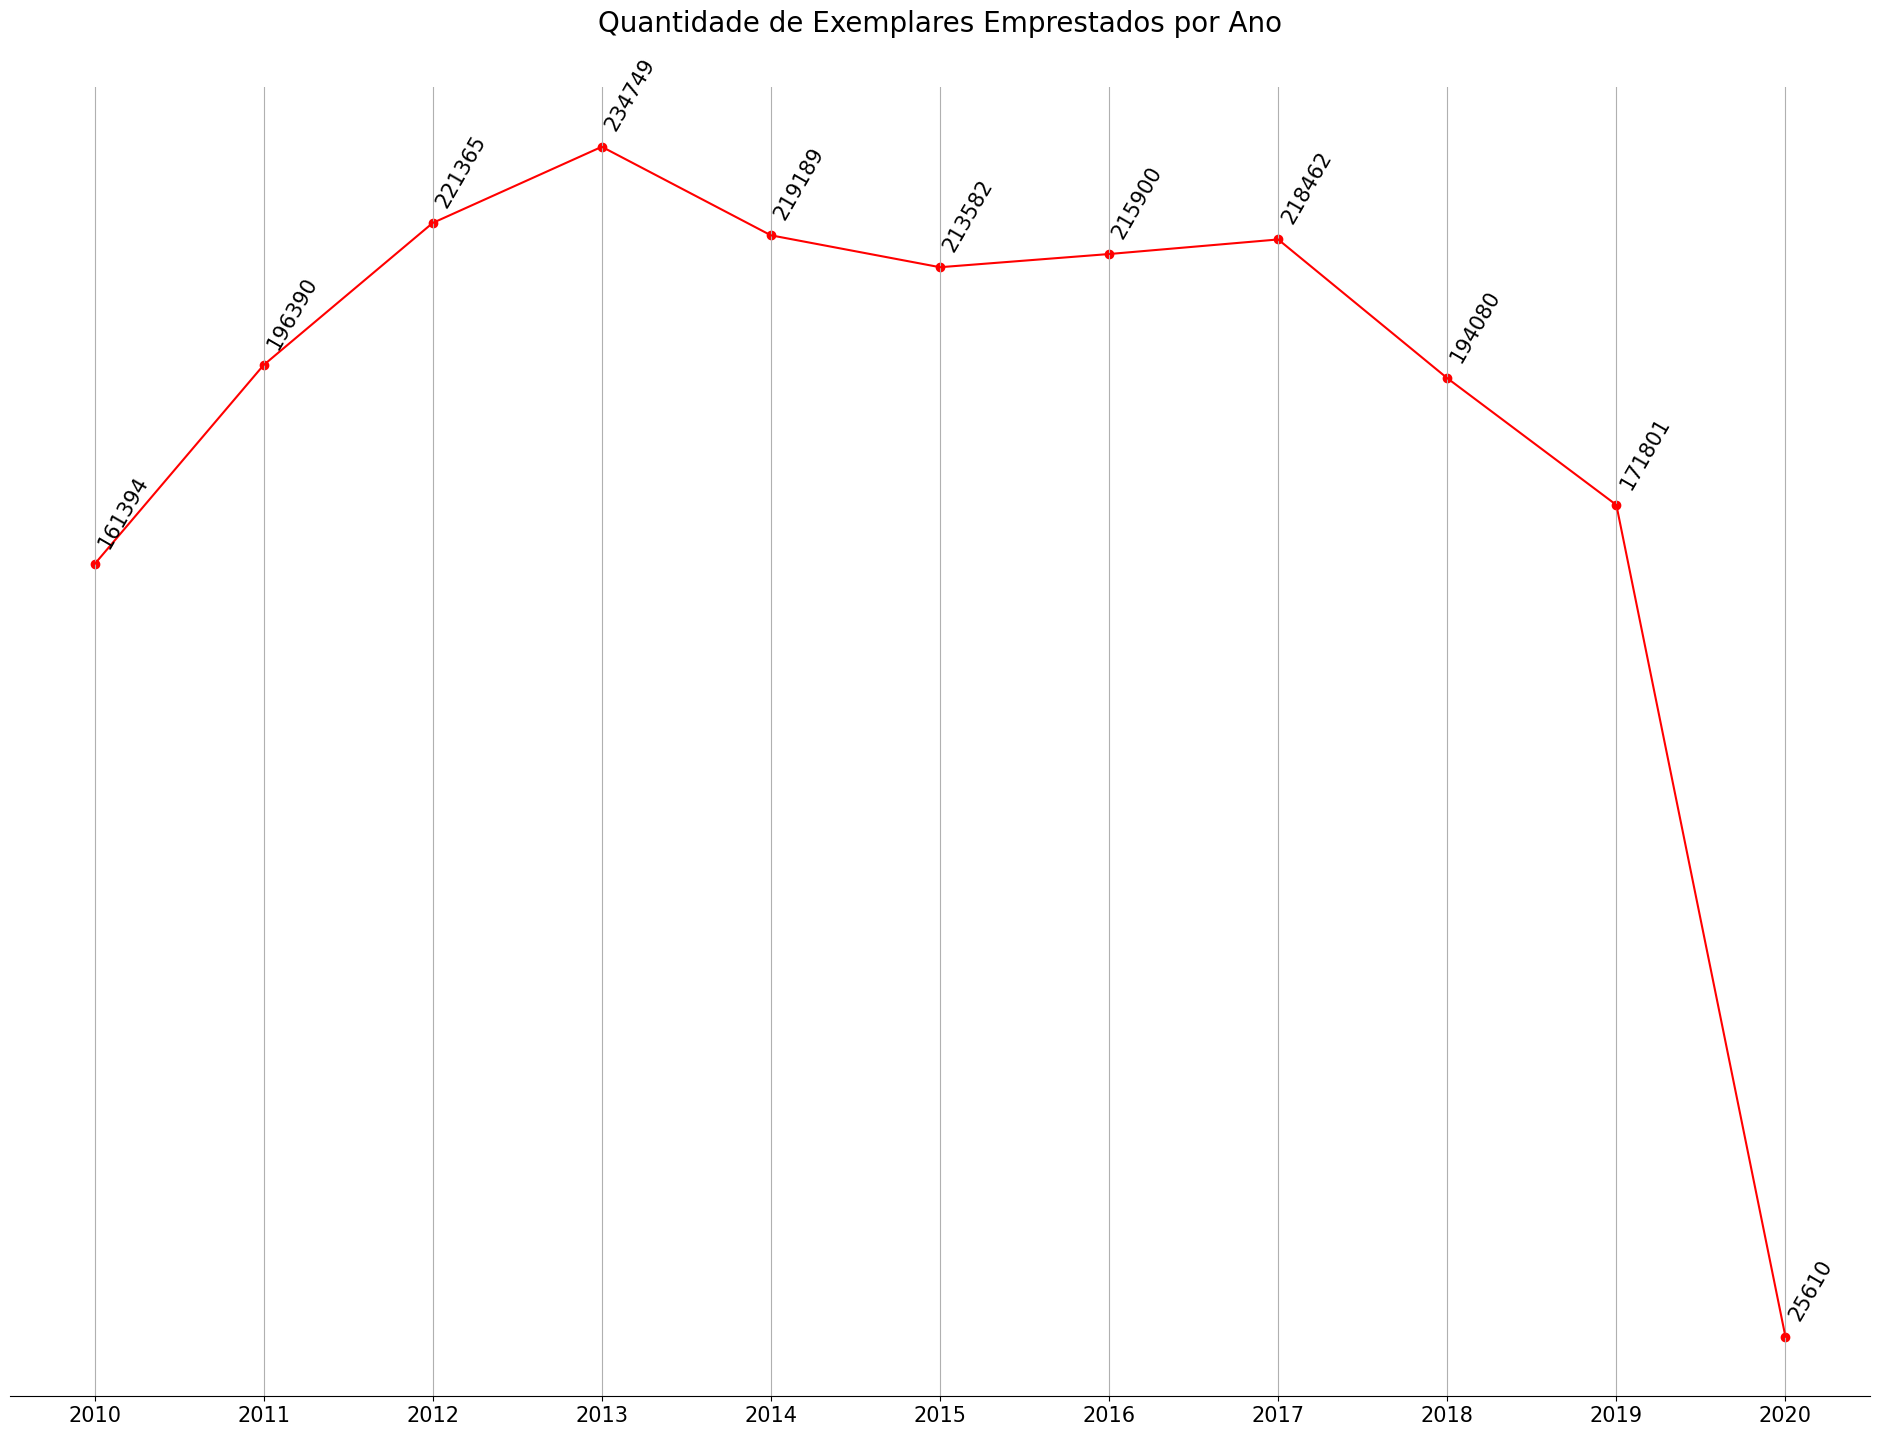

In [298]:
# Gerando um gráfico de linha com os dados de quantidade de exemplares emprestadas por ano

fig, ax = plt.subplots(figsize=(24, 17))

x = df_quantity_per_year.index
y = df_quantity_per_year["id_exemplar"].values

ax.plot(x, y, c='r')

# Gráfico de dispersão para destacar os pontos

ax.scatter(x, y, c='r')

for i in range(len(y)):

    ax.annotate(y[i], 
                (x[i], y[i]), 
                xytext=(0, +12), 
                textcoords="offset points", 
                rotation=60,
                fontsize=15)

ax.set_title("Quantidade de Exemplares Emprestados por Ano", fontsize=20, pad=40)

ax.set(xticks=x) # Exibindo todos os anos no eixo x

ax.tick_params(axis='x', labelsize=15) # Aumentando o tamanho da fonte do eixo x

ax.yaxis.set_visible(False) # Desabilita a visibilidade dos valores do eixo y

# Desabilita a visibilidade das bordas do gráfico
for direction in ["right", "top", "left"]:

    ax.spines[direction].set_visible(False)

ax.grid()

plt.show()

fig.savefig("Quantidade de exemplares emprestados por ano.png")

## Análise

Diante do gráfico, podemos perceber que:
- O ano em que houve __maior__ quantidade de exemplares emprestados foi __2013__. Um dos fatores para esse aumento pode ser a atualização do acervo nas bibliotecas com livros mais atuais, como pode ser visto nessa postagem: [Empréstimos de livros na BPED cresce 26% no primeiro trimestre de 2013](https://www.institutomarcelodeda.com.br/emprestimos-de-livros-na-bped-cresce-26-no-primeiro-trimestre-de-2013/);
- O ano em que houve __menor__ quantidade de exemplares emprestados foi __2020__;
- Entre os anos de __2017 e 2020__, a quantidade de exemplares emprestados por ano __vem diminuindo__, o que pode indicar um __desinteresse por leitura__, ou que as pessoas passaram a __comprar mais livros em vez de pedi-los emprestados na biblioteca__, ou até mesmo pela __disponibilidade dos livros na internet__;
- Houve uma __queda brusca__ na quantidade de exemplares emprestados entre __2019 e 2020__ (Redução de __146191 unidades__).

## Conclusão

A biblioteca deveria investir na montagem de um acervo digital para disponibilizar os seus livros escaneados, de modo que o aluno não precise ir a biblioteca requisitar por esses livros presencialmente e também não precise acessar sites possivelmente não confiáveis para realizar o download desses livros.

Além disso, a biblioteca também poderia realizar parcerias com criadores de conteúdo como forma divulgação e incentivo a leitura.

In [299]:
# Gerando uma coluna correspondente ao mês de empréstimo (desconsiderando o seu respectivo ano)

df["mes"] = df["data_emprestimo"].apply(lambda x: x.month)

In [300]:
# Visualizando os 5 primeiros registros

df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU,ano,mes
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas,2010,1
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas,2010,1
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas,2010,1
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas,2010,1
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas,2010,1


In [301]:
# Gerando um DataFrame da quantidade de exemplares emprestados por mês (Desconsiderando cada ano)

df_quantity_per_month = df.groupby("mes")[["id_exemplar"]].count()

In [302]:
# Visualizando o DataFrame da quantidade de exemplares emprestados por mês

display(df_quantity_per_month)

,id_exemplar
mes,
1,67514
2,210200
3,252185
4,208725
5,202530
6,138123
7,123790
8,232793
9,208234


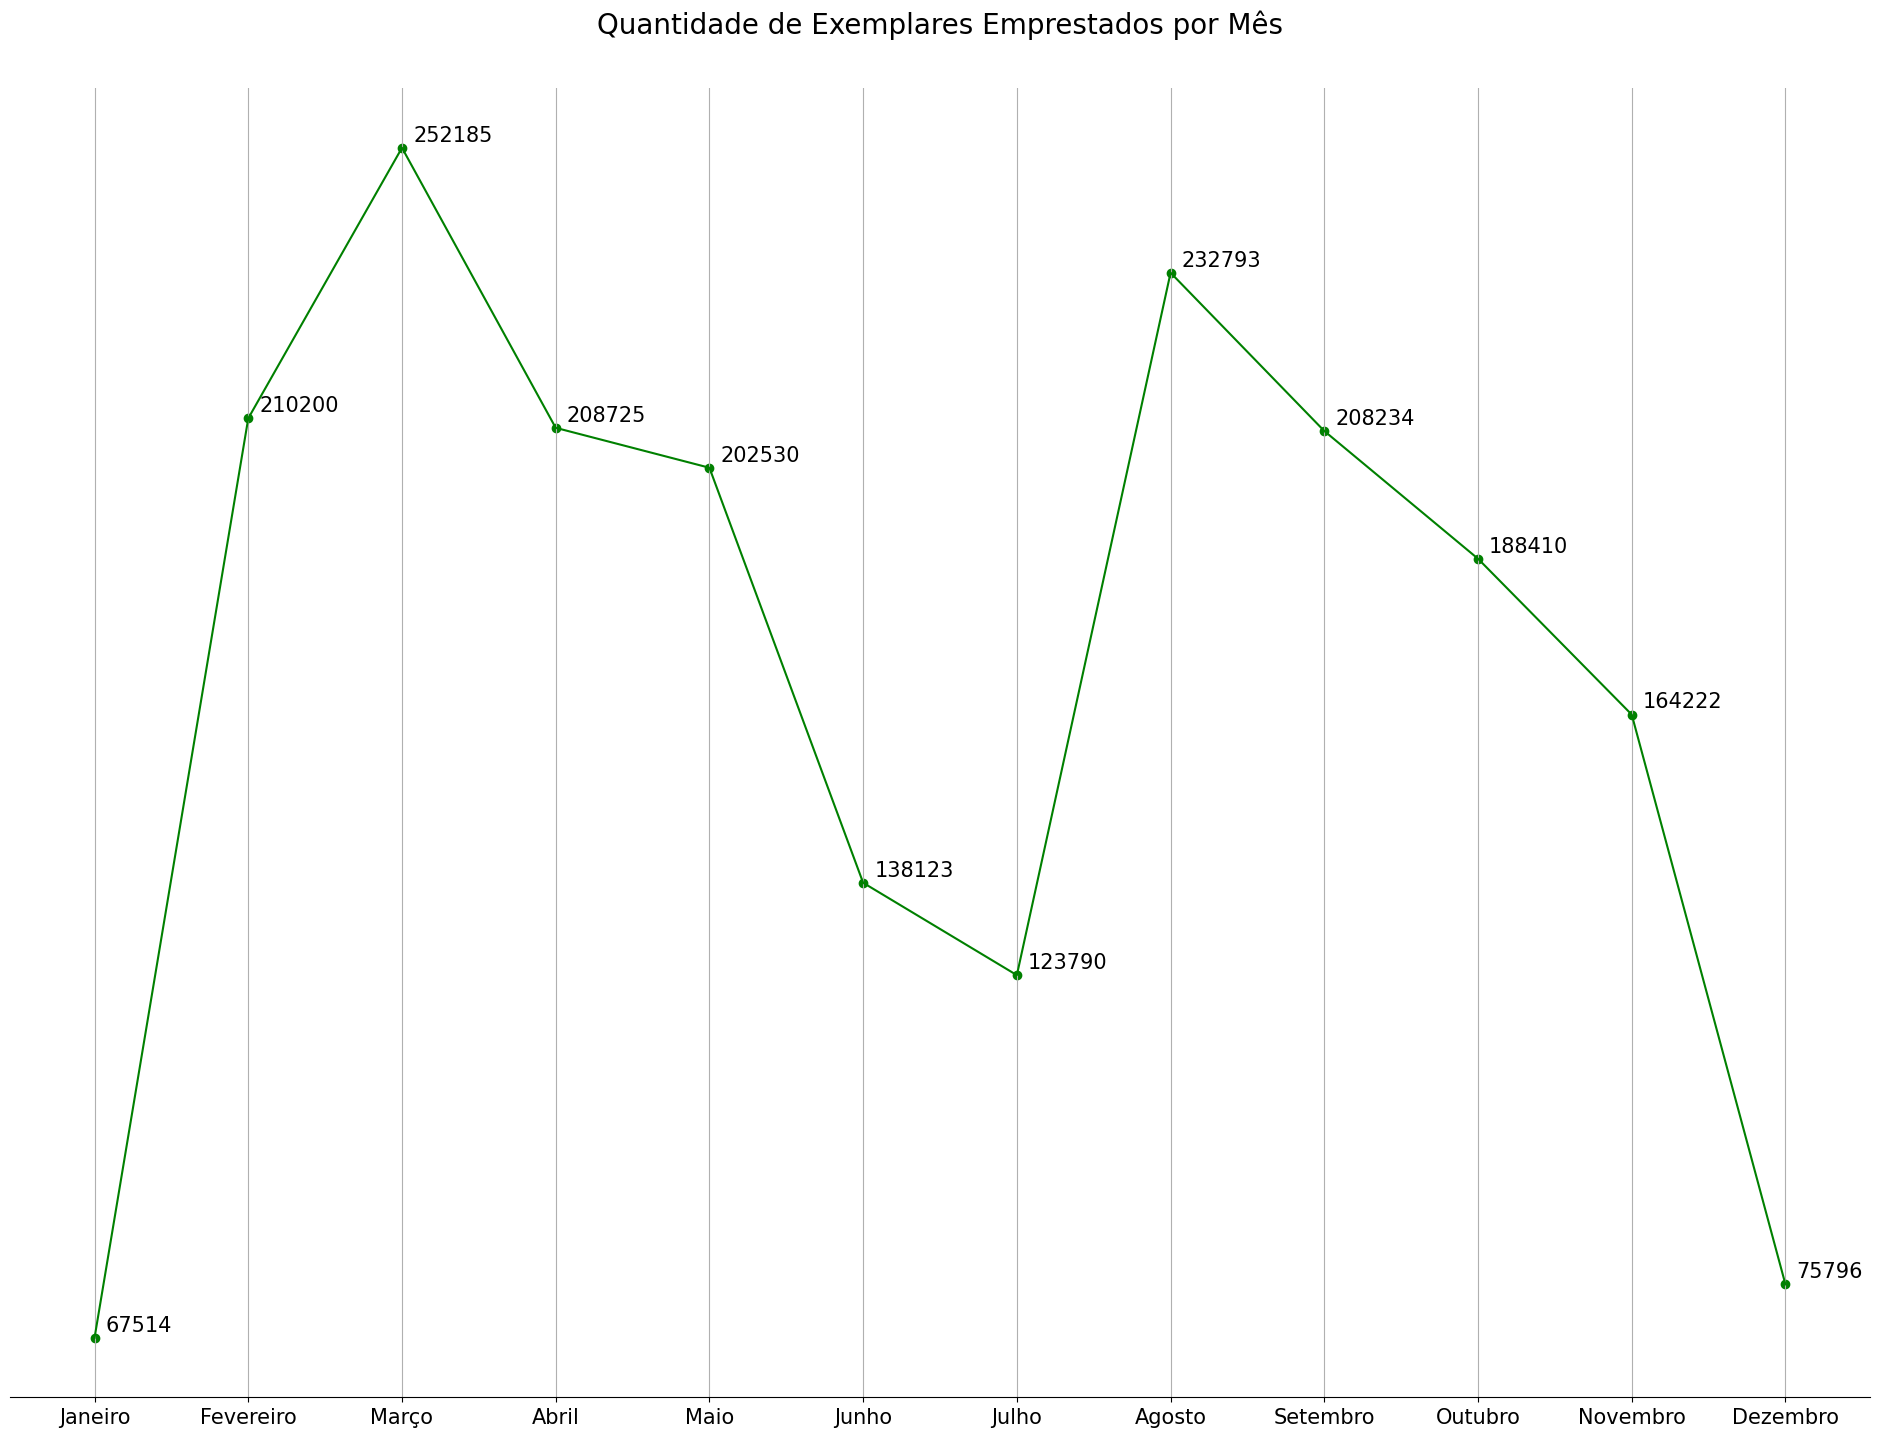

In [303]:
# Gerando um gráfico de linha com os dados de quantidade de exemplares emprestadas por mês

fig, ax = plt.subplots(figsize=(24, 17))

x = df_quantity_per_month.index
y = df_quantity_per_month["id_exemplar"].values

ax.plot(x, y, c='g')

# Gráfico de dispersão para destacar os pontos

ax.scatter(x, y, c='g')

for i in range(len(y)):

    ax.annotate(y[i], 
                (x[i], y[i]), 
                xytext=(+8, +5), 
                textcoords="offset points", 
                #rotation=45,
                fontsize=15)

ax.set_title("Quantidade de Exemplares Emprestados por Mês", fontsize=20, pad=40)

ax.set(xticks=x) # Exibindo todos os anos no eixo x

month_names = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"] 

ax.set_xticklabels(month_names) # Subsituindo os valores de exibição do eixo x para os nomes dos meses

ax.tick_params(axis='x', labelsize=15) # Aumentando o tamanho da fonte

ax.yaxis.set_visible(False) # Desabilita a visibilidade dos valores do eixo y

# Desabilita a visibilidade das bordas do gráfico
for direction in ["right", "top", "left"]:

    ax.spines[direction].set_visible(False)

ax.grid()

plt.show()

fig.savefig("Quantidade de Exemplares Emprestados por Mês.png")

## Análise

Diante do gráfico, podemos perceber que:
- De fato, o mês com __maior__ quantidade de exemplares emprestados foi __Março__;
- O __segundo__ mês com __maior__ quantidade de exemplares emprestados foi __Agosto__, e __não Setembro__;
- Os pontos citados acima podem ser resultantes do início das aulas após as férias, devido a demanda por livros das novas matérias;
- O mês com __menor__ quantidade de exemplares emprestados foi __Janeiro__;
- O meses com __menor__ quantidade de exemplares vendidos foram __Janeiro, Julho e Dezembro__, que são meses os quais os estudantes estão de __férias__, de modo que a atividade de ir a biblioteca para pedir emprestado um livro é menos frequente.

## Conclusão

A biblioteca deve direcionar seus esforços para os meses de Fevereiro, Março e Agosto, pois são neles que, geralmente, ocorrem o início dos semestres com novas matérias a serem estudadas, e que levam aos alunos requisitarem o emprestimo dos respectivos livros dessas matérias.

In [304]:
# Gerando uma coluna do horário no dia em que o emprestimo é realizado

df["horario"] = df["data_emprestimo"].apply(lambda x: x.hour)

In [305]:
# Gerando um DataFrame da quantidade de exemplares emprestados por hora

df_quantity_per_hour = df.groupby("horario")[["id_exemplar"]].count()

In [306]:
# Visualizando o DataFrame da quantidade de exemplares emprestados por hora

display(df_quantity_per_hour)

,id_exemplar
horario,
0,17
6,14
7,18777
8,103416
9,131273
10,185839
11,180048
12,148754
13,126987


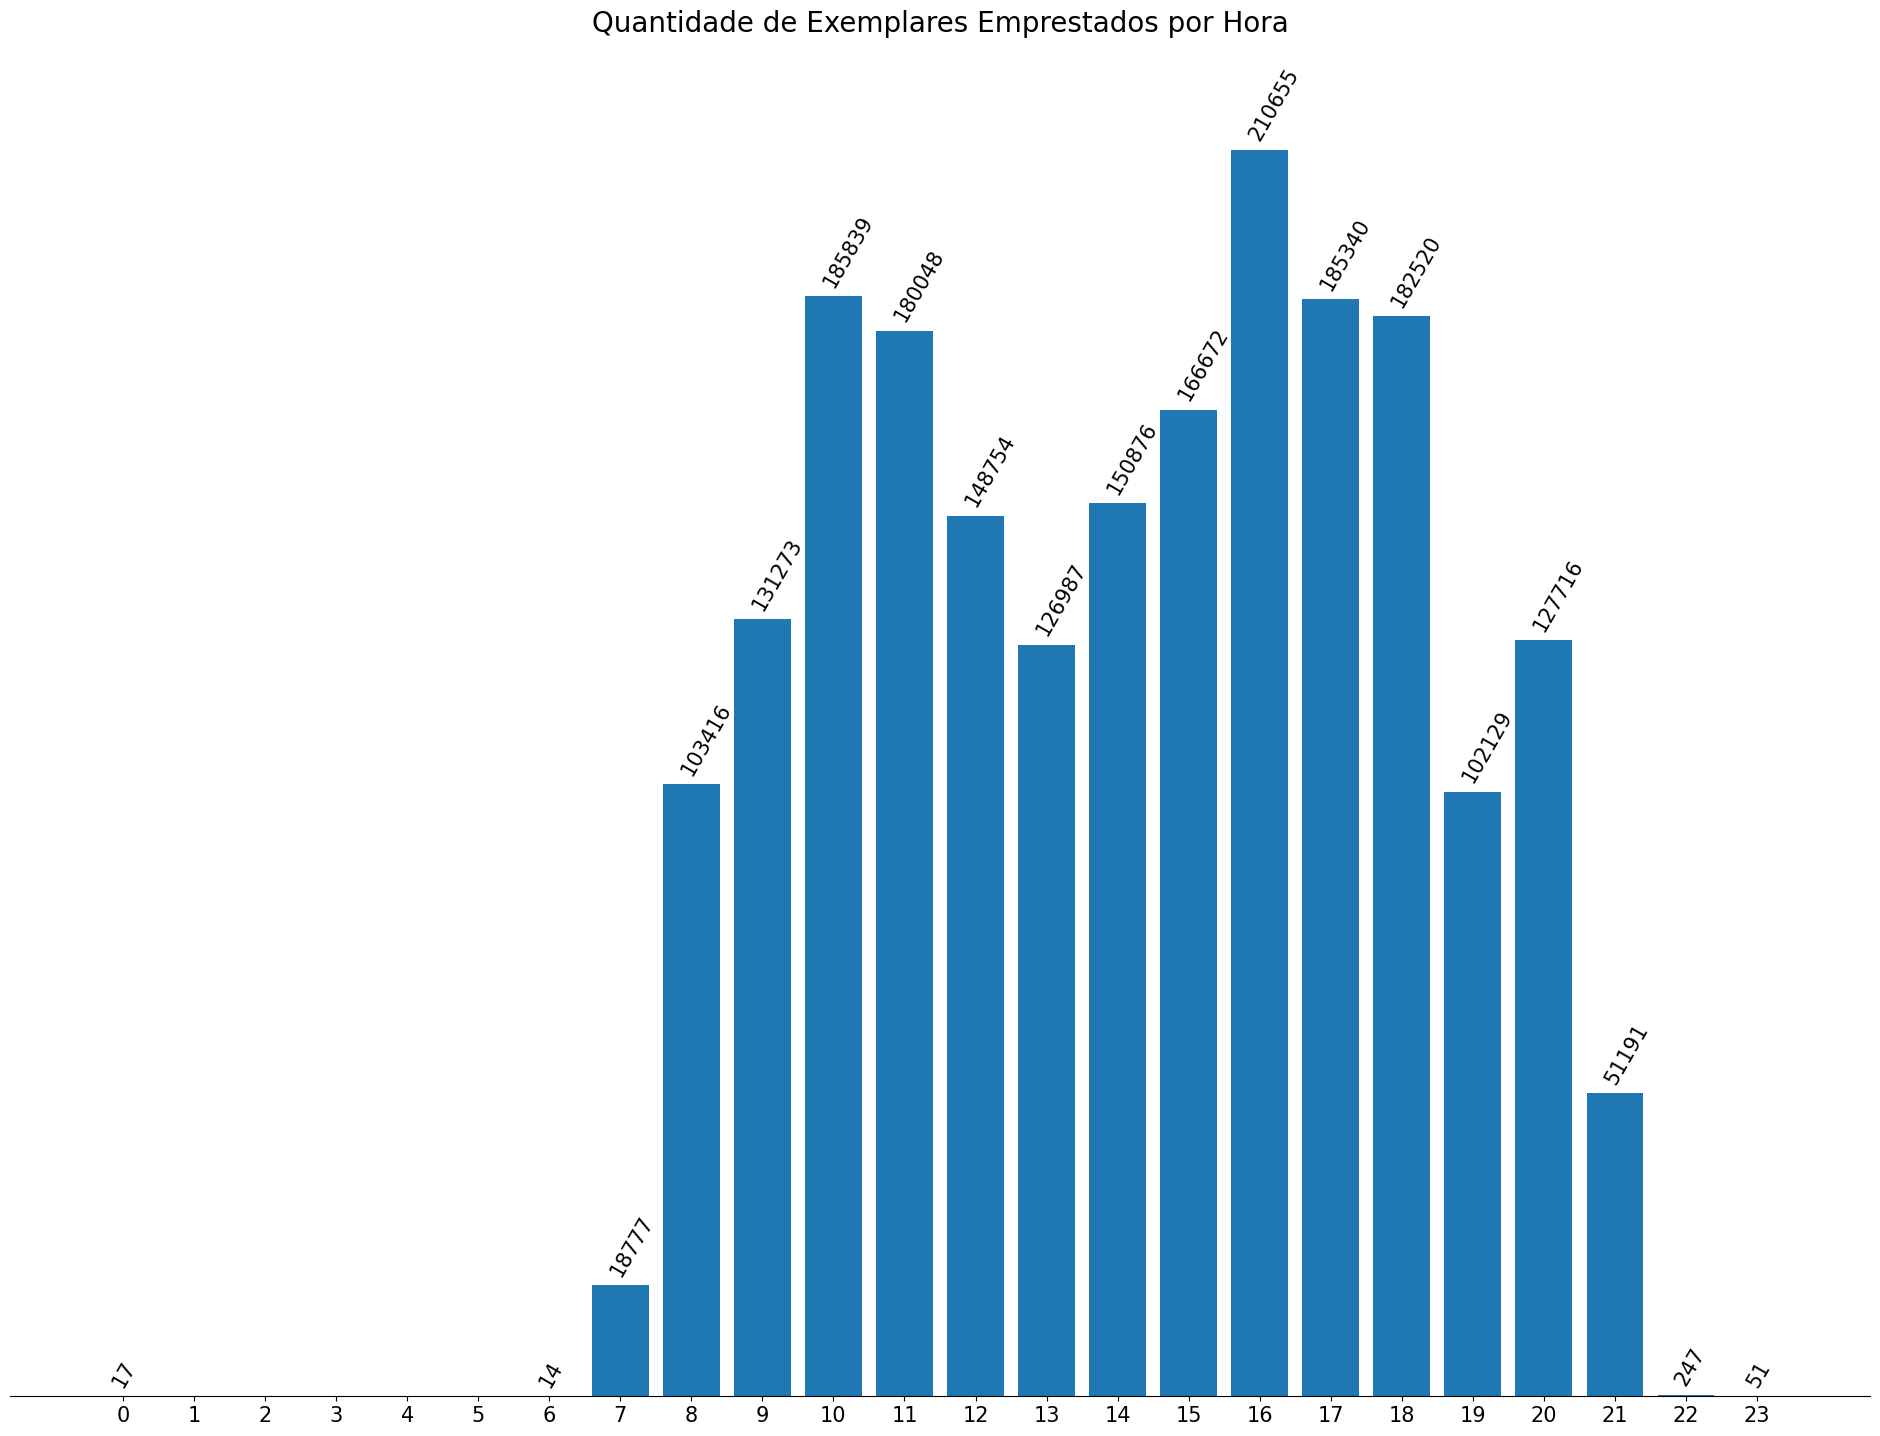

In [307]:
# Gerando um gráfico de linha com os dados de quantidade de exemplares emprestadas por mês

fig, ax = plt.subplots(figsize=(24, 17))

x = df_quantity_per_hour.index
y = df_quantity_per_hour["id_exemplar"].values

ax.bar(x, height=y)

for i in range(len(y)):

    ax.annotate(y[i], 
                (x[i], y[i]), 
                xytext=(-10, +7), 
                textcoords="offset points", 
                #rotation=45,
                fontsize=15,
                rotation=60)

ax.set_title("Quantidade de Exemplares Emprestados por Hora", fontsize=20, pad=40)

ax.set(xticks=list(range(0, 24))) # Exibindo todos os anos no eixo x

ax.tick_params(axis='x', labelsize=15) # Aumentando o tamanho da fonte

ax.yaxis.set_visible(False) # Desabilita a visibilidade dos valores do eixo y

# Desabilita a visibilidade das bordas do gráfico
for direction in ["right", "top", "left"]:

    ax.spines[direction].set_visible(False)

plt.show()

fig.savefig("Quantidade de Exemplares Emprestados por Hora.png")

## Análise

Diante do gráfico, podemos perceber que:
- O horário com __maior__ quantidade de exemplares emprestados no dia é __16h (4 horas da tarde)__;
- O horário com __menor__ quantidade de exemplares emprestados no dia é __6h (6 horas da manhã)__;
- Os horários com __menor__ quantidade de exemplares emprestados no dia são __entre 22h e 6h__, que correspondem __à madrugada e início da manhã do dia__, horários esses em que os alunos, provavelmente, estão __dormindo__;
- Os horários com __maior__ quantidade de exemplares emprestados estão __entre 10h e 11h, e entre 16h e 18h__, que correspondem a __horários de aula do turno matutino e vespertino__.

## Conclusão

A biblioteca deveria definir seu horário de funcionamento para os horários de atividade escolar dos três turnos: matutino, vespertino e noturno. Além disso, alocar mais colaboradores para os horários de pico desses turnos (matutino, de 10h a 11h; vespertino, de 16h a 18h; e noturno, de 19h a 20h).

In [308]:
# Verificando a quantidade de valores únicos das colunas

df.nunique()

id_emprestimo           2068724
codigo_barras            238217
data_renovacao           908884
data_emprestimo         2068691
data_devolucao          2044372
matricula_ou_siape       100560
tipo_vinculo_usuario          8
id_exemplar              238713
colecao                      16
biblioteca                   22
status_material               3
localizacao                 900
CDU                           9
ano                          11
mes                          12
horario                      19
dtype: int64

In [309]:
# Verificando quais são os valores únicos das colunas "tipo_vinculo_usuario", "colecao", "biblioteca" e "CDU"

for column_name in ["tipo_vinculo_usuario", "colecao", "biblioteca", "CDU"]:

    print("---"*20)
    print("Coluna:", column_name)
    print("Valores únicos:", "\n".join(df[column_name].unique()))
    print("---"*20)

------------------------------------------------------------
Coluna: tipo_vinculo_usuario
Valores únicos: ALUNO DE GRADUAÇÃO
ALUNO DE PÓS-GRADUAÇÃO
DOCENTE
SERVIDOR TÉCNICO-ADMINISTRATIVO
DOCENTE EXTERNO
ALUNO MÉDIO/TÉCNICO
USUÁRIO EXTERNO
OUTROS
------------------------------------------------------------
------------------------------------------------------------
Coluna: colecao
Valores únicos: Acervo Circulante
Folhetos
Teses
Dissertações
Monografias
Publicações de Autores do RN
Publicações da UFRN
Multimeios
Coleção Mossoroense
Eventos
Trabalho Acadêmico
Obras de Referência
Obras Raras
Literatura de Cordel
Coleção Zila Mamede
Necessidades Educacionais Específicas
------------------------------------------------------------
------------------------------------------------------------
Coluna: biblioteca
Valores únicos: Biblioteca Central Zila Mamede
Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba
Biblioteca Setorial Bertha Cruz Enders - ­Esco

In [310]:
""" 
Criando uma cópia do DataFrame completo (Por algum motivo, quando uso o método groupby do DataFrame a partir daqui, o objeto guardado na variável 'df'
é substituido pelo DataFrame retornado pelo método de agregação da classe DataFrameGroupBy)
"""

df_copy = df.copy()

In [311]:
# Gerando um Dataframe da quantidade de exemplares emprestados por tipo de vinculo, e ordenando por quantidade 

df_quantity_per_type = df.groupby("tipo_vinculo_usuario")[["id_exemplar"]].count().sort_values(by="id_exemplar", ascending=False)

In [312]:
# Analisando o Dataframe da quantidade de exemplares emprestados por tipo de vinculo

display(df_quantity_per_type)

,id_exemplar
tipo_vinculo_usuario,
ALUNO DE GRADUAÇÃO,1612324
ALUNO DE PÓS-GRADUAÇÃO,302541
DOCENTE,70981
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184
ALUNO MÉDIO/TÉCNICO,28029
DOCENTE EXTERNO,23949
USUÁRIO EXTERNO,2509
OUTROS,5


In [313]:
# Gerando um Dataframe da quantidade de exemplares emprestados por coleção, e ordenando por quantidade 

df_quantity_per_collection = df.groupby("colecao")[["id_exemplar"]].count().sort_values(by="id_exemplar", ascending=False)

In [314]:
# Analisando o Dataframe da quantidade de exemplares emprestados por coleção

display(df_quantity_per_collection)

,id_exemplar
colecao,
Acervo Circulante,2053120
Multimeios,7954
Monografias,4021
Dissertações,2406
Obras de Referência,1954
Publicações de Autores do RN,866
Publicações da UFRN,764
Teses,714
Folhetos,271


In [315]:
# Gerando um Dataframe da quantidade de exemplares emprestados por biblioteca, e ordenando por quantidade

df_quantity_per_library = df.groupby("biblioteca")[["id_exemplar"]].count().sort_values(by="id_exemplar", ascending=False)

In [316]:
# Analisando o Dataframe da quantidade de exemplares emprestados por biblioteca

display(df_quantity_per_library)

,id_exemplar
biblioteca,
Biblioteca Central Zila Mamede,1426122
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089


In [317]:
# Gerando um Dataframe da quantidade de exemplares emprestados por CDU, e ordenando por quantidade

df_quantity_per_cdu = df.groupby("CDU")[["id_exemplar"]].count().sort_values(by="id_exemplar", ascending=False)

In [318]:
# Analisando o Dataframe da quantidade de exemplares emprestados por tipo de vinculo

display(df_quantity_per_cdu)

,id_exemplar
CDU,
Ciências aplicadas,1425473
Ciências sociais,369536
Matemática e ciências naturais,68744
Generalidades. Ciência e conhecimento,62521
Religião,62295
Filosofia e psicologia,60563
Geografia. Biografia. História,7989
Belas artes,7911
Linguagem. Língua. Linguística,7490


In [319]:
# Definindo uma função que gere um DataFrame com a frequencia das variáveis categóricas

def generateFrequencyData(data: pd.Series | pd.Index, data_count: pd.Series) -> pd.DataFrame:

    row_data = [(data[i], round(data_count[i] / data_count.sum(), 2)) for i in range(len(data))]

    return pd.DataFrame(row_data, columns=[data.name, "frequencia"])    

In [320]:
for df in [df_quantity_per_type, df_quantity_per_collection, df_quantity_per_library, df_quantity_per_cdu]:

    display(generateFrequencyData(df.index, df[df.columns[0]]))

C:\Users\Pestana\AppData\Local\Temp\ipykernel_12052\3004790107.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_data = [(data[i], round(data_count[i] / data_count.sum(), 2)) for i in range(len(data))]


,tipo_vinculo_usuario,frequencia
0,ALUNO DE GRADUAÇÃO,0.78
1,ALUNO DE PÓS-GRADUAÇÃO,0.15
2,DOCENTE,0.03
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,0.02
4,ALUNO MÉDIO/TÉCNICO,0.01
5,DOCENTE EXTERNO,0.01
6,USUÁRIO EXTERNO,0.00
7,OUTROS,0.00


C:\Users\Pestana\AppData\Local\Temp\ipykernel_12052\3004790107.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_data = [(data[i], round(data_count[i] / data_count.sum(), 2)) for i in range(len(data))]


,colecao,frequencia
0,Acervo Circulante,0.99
1,Multimeios,0.00
2,Monografias,0.00
3,Dissertações,0.00
4,Obras de Referência,0.00
5,Publicações de Autores do RN,0.00
6,Publicações da UFRN,0.00
7,Teses,0.00
8,Folhetos,0.00
9,Necessidades Educacionais Específicas,0.00


C:\Users\Pestana\AppData\Local\Temp\ipykernel_12052\3004790107.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_data = [(data[i], round(data_count[i] / data_count.sum(), 2)) for i in range(len(data))]


,biblioteca,frequencia
0,Biblioteca Central Zila Mamede,0.69
1,Biblioteca Setorial do Centro Ciências da Saúd...,0.06
2,Biblioteca Setorial da Faculdade de Ciências d...,0.04
3,Biblioteca Setorial Prof. Alberto Moreira Camp...,0.03
4,Biblioteca Setorial Profª. Maria Lúcia da Cost...,0.03
5,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,0.02
6,Biblioteca Setorial do Centro de Ciências Huma...,0.02
7,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,0.02
8,Biblioteca Setorial Profª. Maria José Mamede G...,0.01
9,Biblioteca Setorial Prof. Rodolfo Helinski - E...,0.01


C:\Users\Pestana\AppData\Local\Temp\ipykernel_12052\3004790107.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_data = [(data[i], round(data_count[i] / data_count.sum(), 2)) for i in range(len(data))]


,CDU,frequencia
0,Ciências aplicadas,0.69
1,Ciências sociais,0.18
2,Matemática e ciências naturais,0.03
3,Generalidades. Ciência e conhecimento,0.03
4,Religião,0.03
5,Filosofia e psicologia,0.03
6,Geografia. Biografia. História,0.00
7,Belas artes,0.00
8,Linguagem. Língua. Linguística,0.00


## Análise

Diante dos dados gerados, podemos perceber que:

- Quase 100% das coleções emprestadas são de Acervo Circulante;
- Alunos de graduação tendem a pedir mais exemplares emprestados (78%);
- Alunos do ensino médio/técnico não costumam pedir muitos exemplares emprestados (1%);
- A biblioteca com mais exemplares emprestados é a Biblioteca Central Zila Mamede (69%). Isso pode ser resultado da variedade em seu acervo, ou até mesmo devido a localização;
- Ciências aplicadas é o tema da CDU com mais exemplares emprestados (69%).

## Conclusão

Seria interessante a biblioteca alimentar seu acervo com livros de outras categorias sem ser acadêmicas para trazer públicos com outros tipos de vínculos sem ser alunos em graduação. 

Além disso, incentivar a leitura para esses públicos também pode ser uma abordagem para trazer novos leitores a biblioteca.

Abrir novas bibliotecas em localizações diferentes também pode ajudar as pessoas a irem mais a biblioteca para realizar emprestimos.

Escanear e disponibilizar os livros pela internet pode ser uma abordagem para resolver o problema de localização também.